In [2]:
import torch
import pandas as pd
import numpy as np

# Import dataset utils
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import importlib
if importlib.util.find_spec('ipywidgets') is not None:
    from tqdm.auto import tqdm
else:
    from tqdm import tqdm

In [4]:
dataframe = pd.read_csv('../data/final.csv', sep=';')
# replace all nans with -1
dataframe = dataframe.fillna(-1)
# drop Chave
dataframe = dataframe.drop(['Chave'], axis=1)
dataframe['sexo'].replace({'M': 0, 'F': 1}, inplace=True)

df = dataframe.astype(float)

emb_df = pd.read_csv("gcn_checkpoints/new_data.csv")

# Graph Discovery

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

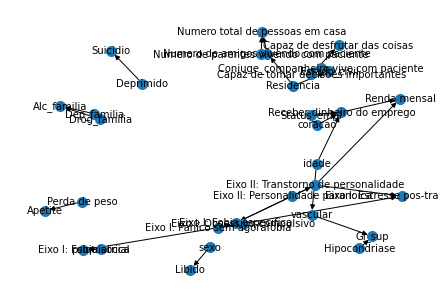

In [10]:
# Load csv
W_graph = np.loadtxt("../W_est.csv", delimiter=",")

# creat directed graph
G = nx.from_numpy_matrix(W_graph, create_using=nx.DiGraph)

# add labels from df to the graph
labels = {i: df.columns[i] for i in range(len(df.columns))}
G = nx.relabel_nodes(G, labels)

# remove nodes with no edges
G2 = G.edge_subgraph(G.edges)
nx.draw_spring(G2, with_labels=True, node_size=100, font_size=10)

In [ ]:
# draw connected components separately with each fig of size (20, 20) without subplots
# get G2 as undirected graph
un_G2 = G2.to_undirected()
for i, g in enumerate(nx.connected_components(un_G2)):
    plt.figure(figsize=(10, 10))
    sub_g = G2.subgraph(g)
    # turn ti directed graph
    # add padding to make sure all nodes are visible
    pos = nx.spring_layout(sub_g, k=0.5, iterations=20)
    nx.draw(sub_g, pos=pos, with_labels=True, node_size=100, font_size=10)

    # get node names and weights
    edges = sub_g.edges
    weights = [sub_g[u][v]['weight'] for u, v in edges]
    for (u, v), w in zip(edges, weights):
        print(f"{u} -> {v} : {w}")

    plt.title(f"Connected component {i}")
    plt.show()

In [12]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, Notears

# # data simulation, simulate true causal dag and train_data.
# weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10, 
#                                       weight_range=(0.5, 2.0), seed=1)
# dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', 
#                         sem_type='gauss')
# true_causal_matrix, X = dataset.B, dataset.X

X = df.values
# structure learning
method = Notears()
method.learn(X)

graph = method.causal_matrix

# Load csv
# creat directed graph
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)

# add labels from df to the graph
labels = {i: df.columns[i] for i in range(len(df.columns))}
G = nx.relabel_nodes(G, labels)

# remove nodes with no edges
G2 = G.edge_subgraph(G.edges)
nx.draw_spring(G2, with_labels=True, node_size=100, font_size=10)


AttributeError: 'NoneType' object has no attribute 'shape'

2022-12-10 17:31:13,837 - /homeLocal/miniconda3/envs/cml/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/nonlinear.py[line:137] - INFO: GPU is unavailable.
2022-12-10 17:31:13,848 - /homeLocal/miniconda3/envs/cml/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/nonlinear.py[line:237] - INFO: [start]: n=3162, d=68, iter_=100, h_=1e-08, rho_=1e+16
2022-12-10 17:44:14,332 - /homeLocal/miniconda3/envs/cml/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/nonlinear.py[line:249] - INFO: FINISHED


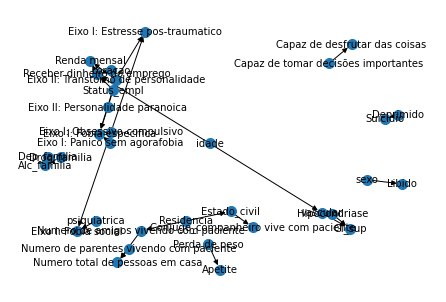

In [15]:
from castle.algorithms import GOLEM, Notears, NotearsNonlinear
X = emb_df.values

# structure learning
method = NotearsNonlinear()
method.learn(X)

graph = method.causal_matrix

# Load csv
# creat directed graph
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)

# add labels from df to the graph
labels = {i: df.columns[i] for i in range(len(df.columns))}
G = nx.relabel_nodes(G, labels)

# remove nodes with no edges
G2 = G.edge_subgraph(G.edges)
nx.draw_spring(G2, with_labels=True, node_size=100, font_size=10)
